In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/report-lang/report_lang.csv
/kaggle/input/amazon/amazon_reviews.csv


In [3]:
#for data wrangling and manipulation
import pandas as pd
import numpy as np
import requests
#for NLP text processing and formatting

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# For word lemmitization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# for word Stemming

from nltk.stem.porter import PorterStemmer

# # for Machine Learning process
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

# for Machine Learning model evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Global Parameters
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

# from autosklearn.regression import AutoSklearnRegressor

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv("../input/amazon/amazon_reviews.csv")

In [5]:
review_data = pd.read_csv("../input/report-lang/report_lang.csv")

In [6]:
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [7]:
review_data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,de_0380964,product_de_0207270,reviewer_de_0000597,3,Holz ist nicht so stabil aber in Ordnung.Leich...,Alles in Ordnung,de,lawn_and_garden
1,es_0941238,product_es_0029761,reviewer_es_0819950,3,Mi hija la lleva muy contenta desde hace un me...,Satisfechos con la compra,es,luggage
2,fr_0072627,product_fr_0223945,reviewer_fr_0161604,2,Les pierres laissent beaucoup de dépôts dans l...,Satisfaisant,fr,home
3,es_0601757,product_es_0159974,reviewer_es_0604124,5,"Llego antes de lo esperado, todo bien.",Todo correcto,es,wireless
4,fr_0626789,product_fr_0580749,reviewer_fr_0780261,2,"Bon produit, facile et rapide à monter mais je...","Bon produit, facile a monter mais je n'ai pas ...",fr,furniture
...,...,...,...,...,...,...,...,...
1994,fr_0069596,product_fr_0982026,reviewer_fr_0684517,4,Pour travail de nuit Assez puissante autonomie...,Répond à mes attentes,fr,home_improvement
1995,es_0269270,product_es_0275292,reviewer_es_0848888,1,"Buenas, se hicieron 2 pedidos el mismo día, el...",Se hizo devolucion de este producto y no hemos...,es,wireless
1996,es_0366963,product_es_0129883,reviewer_es_0305590,4,Tenía ganas de tener una cuchilla de afeitar a...,La manera más precisa de perfilar la barba,es,drugstore
1997,de_0170518,product_de_0730308,reviewer_de_0857176,4,"Toll, die Zwiebeln werden klein geschnitten, a...",Super Gerät,de,kitchen


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


In [9]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review_id         1999 non-null   object
 1   product_id        1999 non-null   object
 2   reviewer_id       1999 non-null   object
 3   stars             1999 non-null   int64 
 4   review_body       1999 non-null   object
 5   review_title      1999 non-null   object
 6   language          1999 non-null   object
 7   product_category  1999 non-null   object
dtypes: int64(1), object(7)
memory usage: 125.1+ KB


In [10]:
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [11]:
review_data.count()

review_id           1999
product_id          1999
reviewer_id         1999
stars               1999
review_body         1999
review_title        1999
language            1999
product_category    1999
dtype: int64

In [12]:
text = " ".join(title for title in review_data['review_body'])

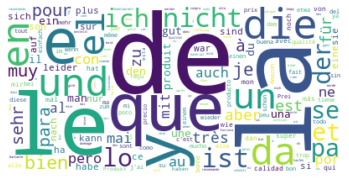

In [13]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text) # Display the generated Word Cloud 
plt.imshow(word_cloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

In [14]:
pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 689.7 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.2 MB/s eta 0:00:00:00:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=d89a5f4cbdde90dba50e061678d2949597c32abcaad0d63056dee91c83d07918
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.

In [15]:
from googletrans import Translator

In [16]:
translator = Translator()

In [17]:
translated_lang = translator.translate(review_data['review_body'][0],dest = 'en').text

In [18]:
review_data['review_body'][1]

'Mi hija la lleva muy contenta desde hace un mes al colegio. Le resulta cómoda y ligera. Una pega sería el bolsillo para tablet o portátil, pues la parte delantera es de tela bastante blanda, la trasera muy bien acolchada.'

In [19]:
translated_lang = translator.translate(review_data['review_body'][1],dest = 'en').text

In [20]:
translated_lang

'My daughter has been very happy for a month at school. She finds it comfortable and light. One drawback would be the pocket for a tablet or laptop, since the front part is made of quite soft fabric, the back is very well padded.'

In [21]:
print(translated_lang)

My daughter has been very happy for a month at school. She finds it comfortable and light. One drawback would be the pocket for a tablet or laptop, since the front part is made of quite soft fabric, the back is very well padded.


In [24]:
for i in range(0,len(review_data['review_body'])):
    translated_lang = translator.translate(review_data['review_body'][i],dest = 'en').text
    review_data['translated_text'][i]= translated_lang

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
review_data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,translated_text
0,de_0380964,product_de_0207270,reviewer_de_0000597,3,Holz ist nicht so stabil aber in Ordnung.Leich...,Alles in Ordnung,de,lawn_and_garden,Wood is not so stable but ok. Easy to put toge...
1,es_0941238,product_es_0029761,reviewer_es_0819950,3,Mi hija la lleva muy contenta desde hace un me...,Satisfechos con la compra,es,luggage,My daughter has been very happy for a month at...
2,fr_0072627,product_fr_0223945,reviewer_fr_0161604,2,Les pierres laissent beaucoup de dépôts dans l...,Satisfaisant,fr,home,The stones leave a lot of deposits in the glas...
3,es_0601757,product_es_0159974,reviewer_es_0604124,5,"Llego antes de lo esperado, todo bien.",Todo correcto,es,wireless,"I arrive earlier than expected, all good."
4,fr_0626789,product_fr_0580749,reviewer_fr_0780261,2,"Bon produit, facile et rapide à monter mais je...","Bon produit, facile a monter mais je n'ai pas ...",fr,furniture,"Good product, easy and quick to assemble but I..."


In [26]:
print("Before {}".format(len(df)))
dataAfter = df.dropna(subset=["overall"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["overall"] = dataAfter["overall"].astype(int)

Before 4915
After 4915


In [27]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["overall"]): 
    start_train = dataAfter.reindex(train_index)
    start_test = dataAfter.reindex(test_index)

In [28]:
len(start_train)

3932

In [29]:
start_train["overall"].value_counts()/len(start_train) # value_count() counts all the values based on column

5    0.798067
4    0.107070
1    0.049593
3    0.028993
2    0.016277
Name: overall, dtype: float64

In [30]:
len(start_test)

983

In [32]:
reviews = start_train.copy()
reviews.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
4807,4807,William Garvin,5,Card is recognized as 59.5GB as expected. I'm...,2013-10-06,428,0,0,0,0,0.0,0.000000
1881,1881,G.R.K.,5,"The supplied card with the R8 is 2GB, that onl...",2014-04-04,248,0,0,0,0,0.0,0.000000
513,513,AYMEN3M,4,"Fast , no problems , i loved the price and it ...",2014-02-28,283,0,0,0,0,0.0,0.000000
1802,1802,Gig,5,I didn't run any metric software on this chip ...,2012-08-24,836,1,0,1,1,1.0,0.206549
3765,3765,RC,5,Works well with my dslr. Have never been able ...,2013-12-26,347,0,0,0,0,0.0,0.000000


In [33]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3932 entries, 4807 to 918
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3932 non-null   int64  
 1   reviewerName          3931 non-null   object 
 2   overall               3932 non-null   int64  
 3   reviewText            3931 non-null   object 
 4   reviewTime            3932 non-null   object 
 5   day_diff              3932 non-null   int64  
 6   helpful_yes           3932 non-null   int64  
 7   helpful_no            3932 non-null   int64  
 8   total_vote            3932 non-null   int64  
 9   score_pos_neg_diff    3932 non-null   int64  
 10  score_average_rating  3932 non-null   float64
 11  wilson_lower_bound    3932 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 399.3+ KB


In [34]:
corr_matrix = reviews.corr()
corr_matrix

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
Unnamed: 0,1.000000,-0.012031,-0.020339,-0.003900,0.005208,-0.003414,-0.004408,-0.016992,-0.014123
overall,-0.012031,1.000000,-0.096451,0.001839,-0.053060,-0.001742,0.005678,-0.147115,-0.128949
day_diff,-0.020339,-0.096451,1.000000,0.023539,0.022814,0.024200,0.022745,0.125930,0.124526
helpful_yes,-0.003900,0.001839,0.023539,1.000000,0.521087,0.998401,0.998155,0.075213,0.234764
helpful_no,0.005208,-0.053060,0.022814,0.521087,1.000000,0.568507,0.468301,0.063223,0.184312
total_vote,-0.003414,-0.001742,0.024200,0.998401,0.568507,1.000000,0.993126,0.076684,0.238494
score_pos_neg_diff,-0.004408,0.005678,0.022745,0.998155,0.468301,0.993126,1.000000,0.073364,0.229921
score_average_rating,-0.016992,-0.147115,0.125930,0.075213,0.063223,0.076684,0.073364,1.000000,0.886374
wilson_lower_bound,-0.014123,-0.128949,0.124526,0.234764,0.184312,0.238494,0.229921,0.886374,1.000000


In [35]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3932 entries, 4807 to 918
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3932 non-null   int64  
 1   reviewerName          3931 non-null   object 
 2   overall               3932 non-null   int64  
 3   reviewText            3931 non-null   object 
 4   reviewTime            3932 non-null   object 
 5   day_diff              3932 non-null   int64  
 6   helpful_yes           3932 non-null   int64  
 7   helpful_no            3932 non-null   int64  
 8   total_vote            3932 non-null   int64  
 9   score_pos_neg_diff    3932 non-null   int64  
 10  score_average_rating  3932 non-null   float64
 11  wilson_lower_bound    3932 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 399.3+ KB


In [36]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1) or (rating == 0):
        return "Negative"
# Add sentiments to the data
start_train["Sentiment"] = start_train["overall"].apply(sentiments)
start_test["Sentiment"] = start_test["overall"].apply(sentiments)
start_train["Sentiment"][:20]

4807    Positive
1881    Positive
513     Positive
1802    Positive
3765    Positive
3571    Positive
85      Positive
1820    Positive
1000    Positive
2258    Positive
1241    Positive
1998    Positive
1976    Positive
1571    Positive
201     Positive
580     Positive
965     Positive
3048    Positive
3596    Positive
4701    Positive
Name: Sentiment, dtype: object

In [37]:
review=review_data[['translated_text','stars']]
review.head()

,translated_text,stars
0,Wood is not so stable but ok. Easy to put toge...,3
1,My daughter has been very happy for a month at...,3
2,The stones leave a lot of deposits in the glas...,2
3,"I arrive earlier than expected, all good.",5
4,"Good product, easy and quick to assemble but I...",2


In [38]:
round(review.isnull().sum().sort_values(ascending=False)*100/len(review),2)

translated_text    0.0
stars              0.0
dtype: float64

In [39]:
review=df[['reviewText','overall']]
review.head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [40]:
round(review.isnull().sum().sort_values(ascending=False)*100/len(review),2)

reviewText    0.02
overall       0.00
dtype: float64

In [41]:
review=review.dropna()
review.head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [42]:
review['overall'].unique()

array([4., 5., 3., 1., 2.])

In [43]:
review.overall.value_counts()

5.0    3921
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

In [44]:
review['encoded_cat'] = review.overall.astype('category').cat.codes
review.head()

,reviewText,overall,encoded_cat
0,No issues.,4.0,3
1,"Purchased this for my device, it worked as adv...",5.0,4
2,it works as expected. I should have sprung for...,4.0,3
3,This think has worked out great.Had a diff. br...,5.0,4
4,"Bought it with Retail Packaging, arrived legit...",5.0,4


In [46]:
def preprocess_review_text(review):
    """
    Function to process the the review text and tranform it into format usable by Machine learning models
    """
    
    # to convert all the characters of the review into lower case alphabets
    review.lower()
    
    # Remove urls from the reviews
    review = re.sub(r"http\S+|www\S+|https\S+", '', review, flags=re.MULTILINE)
    
    # Remove user related references from the reviews:: '@' and '#' 
    review = re.sub(r'\@\w+|\#','', review)
    
    # Remove punctuations from the reviews
    review = review.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords from the reviews
    review_tokens = word_tokenize(review)
    filtered_words = [w for w in review_tokens if not w in stop_words]
    joined_text = " ".join(filtered_words)
    
    return joined_text

In [47]:
def get_feature_vector(train_fit):
    """
    Function to Convert a collection of raw documents to a matrix of TF-IDF features.
    TF-IDF - Term Frequency Inverse Documnet Frequency
    """
    
    vector = TfidfVectorizer(sublinear_tf=True)      # Defining the vector
    vector.fit(train_fit)                            # fitting the data into the vector
    return vector                                    # returning the vector as function call

In [48]:
processed_text = review_data['translated_text'].apply(preprocess_review_text)

print("Processed text :: \n\n", processed_text)

Processed text :: 

 0       Wood stable ok Easy put together Coated wood s...
1       My daughter happy month school She finds comfo...
2       The stones leave lot deposits glass use even c...
3                          I arrive earlier expected good
4       Good product easy quick assemble I receive ele...
                              ...                        
1994    For night work Quite powerful Decent battery l...
1995    Good morning 2 orders made day order returned ...
1996    I wanted old fashioned razor I like precision ...
1997                         Great onions chopped crushed
1998    I ordered small jobs Ive really grown love par...
Name: translated_text, Length: 1999, dtype: object


In [49]:
stemmer = PorterStemmer()

stemmed_words = [stemmer.stem(i) for i in processed_text]

In [50]:
lemmatizer = WordNetLemmatizer()
lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]

In [51]:
tf_vector = get_feature_vector(np.array(review_data["translated_text"]).ravel())

In [52]:
X = tf_vector.transform(np.array(review["reviewText"]).ravel())     # Predictor Variable
y = np.array(review["encoded_cat"]).ravel()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [54]:
NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

MultinomialNB()

In [55]:
y_predict_nb = NB_model.predict(X_test)

print("Accuracy Score for Naive Bayes Model is :: ", accuracy_score(y_test, y_predict_nb))

Accuracy Score for Naive Bayes Model is ::  0.7924720244150559


In [56]:
print("Classification_Report :: \n\n", classification_report(y_test, y_predict_nb))

Classification_Report :: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00       102
           4       0.79      1.00      0.88       779

    accuracy                           0.79       983
   macro avg       0.16      0.20      0.18       983
weighted avg       0.63      0.79      0.70       983



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [57]:
# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)


LogisticRegression()

In [58]:
y_predict_lr = LR_model.predict(X_test)

print("Accuracy Score for Logistic Regression Model is :: ",accuracy_score(y_test, y_predict_lr))

Accuracy Score for Logistic Regression Model is ::  0.8006103763987793


In [59]:
from sklearn.metrics import classification_report

print("Classification_Report :: \n\n", classification_report(y_test, y_predict_lr))

Classification_Report :: 

               precision    recall  f1-score   support

           0       0.61      0.20      0.31        54
           1       0.00      0.00      0.00        21
           2       0.50      0.04      0.07        27
           3       0.11      0.01      0.02       102
           4       0.81      0.99      0.89       779

    accuracy                           0.80       983
   macro avg       0.41      0.25      0.26       983
weighted avg       0.70      0.80      0.73       983



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [60]:
round(df['overall'].value_counts()*100/len(df),2)

5.0    79.80
4.0    10.72
1.0     4.96
3.0     2.89
2.0     1.63
Name: overall, dtype: float64

In [61]:
df = df.sort_values("wilson_lower_bound", ascending=False)
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5.0,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,2013-01-05,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5.0,I have tested dozens of SDHC and micro-SDHC ca...,2012-09-26,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1.0,NOTE: please read the last update (scroll to ...,2013-05-08,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1.0,"If your card gets hot enough to be painful, it...",2012-02-09,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5.0,Sandisk announcement of the first 128GB micro ...,2014-07-03,158,45,4,49,41,0.918367,0.808109


In [62]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail = 5):
    
    print(" SHAPE ".center(82,'~'))
    print('Rows: {}'.format(df.shape[0]))
    print('Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(82,'~'))
    print(df.dtypes)
    print("".center(82,'~'))
    print(missing_values_analysis(df))
    print(' DUPLICATED VALUES '.center(83,'~'))
    print(df.duplicated().sum())
    print(" QUANTILES ".center(82,'~'))
    print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_dataframe(df)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Total Missing Values  Ratio
reviewerName                     1   0.02
reviewText                       1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ DUPLICATED VALUES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ QUANTILES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99    

In [63]:
def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                               'Classes': [dataframe[i].nunique() \
                                           for i in dataframe.columns]})

    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop = True)
    return nunique_df

check_class(df)

,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [64]:
constraints = ['#581845','#C70039','#2E4053','#1ABC9C','#7F8C8D']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Countplot','Percentages'),
                        specs=[[{"type": "xy"}, {'type':'domain'}]])

    fig.add_trace(go.Bar( y = df[column_name].value_counts().values.tolist(), 
                          x = [str(i) for i in df[column_name].value_counts().index], 
                          text = df[column_name].value_counts().values.tolist(),
                          textfont = dict(size=15),
                          name = column_name,
                          textposition = 'auto',
                          showlegend=False,
                          marker=dict(color = constraints,
                                      line=dict(color='#DBE6EC',
                                                width=1))),
                  row = 1, col = 1)
    
    fig.add_trace(go.Pie(labels= df[column_name].value_counts().keys(),
                         values= df[column_name].value_counts().values,
                         textfont = dict(size = 20),
                         textposition='auto',
                         showlegend = False,
                         name = column_name,
                         marker=dict(colors=constraints)),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': column_name,
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    
    iplot(fig)

In [65]:
categorical_variable_summary(df,'overall')

In [71]:
example_review = df.reviewText[2031]
example_review

'[[ UPDATE - 6/19/2014 ]]So my lovely wife bought me a Samsung Galaxy Tab 4 for Father\'s Day and I\'ve been loving it ever since.  Just as other with Samsung products, the Galaxy Tab 4 has the ability to add a microSD card to expand the memory on the device.  Since it\'s been over a year, I decided to do some more research to see if SanDisk offered anything new.  As of 6/19/2014, their product lineup for microSD cards from worst to best (performance-wise) are the as follows:SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow, the difference between all of these cards are simply the speed in which you can read/write data to the card.  Yes, the published rating of most all these cards (except the SanDisk regular) are Class 10/UHS-I but that\'s just a rating... Actual real world performance does get better with each model, but with faster cards come more expensive prices.  Since Amazon doesn\'t carry the Ultra PLUS model of microSD card, I had 

In [72]:
example_review = re.sub("[^a-zA-Z]",' ',example_review)
example_review

'   UPDATE               So my lovely wife bought me a Samsung Galaxy Tab   for Father s Day and I ve been loving it ever since   Just as other with Samsung products  the Galaxy Tab   has the ability to add a microSD card to expand the memory on the device   Since it s been over a year  I decided to do some more research to see if SanDisk offered anything new   As of            their product lineup for microSD cards from worst to best  performance wise  are the as follows SanDiskSanDisk UltraSanDisk Ultra PLUSSanDisk ExtremeSanDisk Extreme PLUSSanDisk Extreme PRONow  the difference between all of these cards are simply the speed in which you can read write data to the card   Yes  the published rating of most all these cards  except the SanDisk regular  are Class    UHS I but that s just a rating    Actual real world performance does get better with each model  but with faster cards come more expensive prices   Since Amazon doesn t carry the Ultra PLUS model of microSD card  I had to do

In [73]:
example_review = example_review.lower().split()

In [74]:
example_review


['update',
 'so',
 'my',
 'lovely',
 'wife',
 'bought',
 'me',
 'a',
 'samsung',
 'galaxy',
 'tab',
 'for',
 'father',
 's',
 'day',
 'and',
 'i',
 've',
 'been',
 'loving',
 'it',
 'ever',
 'since',
 'just',
 'as',
 'other',
 'with',
 'samsung',
 'products',
 'the',
 'galaxy',
 'tab',
 'has',
 'the',
 'ability',
 'to',
 'add',
 'a',
 'microsd',
 'card',
 'to',
 'expand',
 'the',
 'memory',
 'on',
 'the',
 'device',
 'since',
 'it',
 's',
 'been',
 'over',
 'a',
 'year',
 'i',
 'decided',
 'to',
 'do',
 'some',
 'more',
 'research',
 'to',
 'see',
 'if',
 'sandisk',
 'offered',
 'anything',
 'new',
 'as',
 'of',
 'their',
 'product',
 'lineup',
 'for',
 'microsd',
 'cards',
 'from',
 'worst',
 'to',
 'best',
 'performance',
 'wise',
 'are',
 'the',
 'as',
 'follows',
 'sandisksandisk',
 'ultrasandisk',
 'ultra',
 'plussandisk',
 'extremesandisk',
 'extreme',
 'plussandisk',
 'extreme',
 'pronow',
 'the',
 'difference',
 'between',
 'all',
 'of',
 'these',
 'cards',
 'are',
 'simply',
 

In [75]:
review_data[['polarity', 'subjectivity']] = review_data['translated_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in review_data['translated_text'].iteritems():

    score = SentimentIntensityAnalyzer().polarity_scores(row)

    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        review_data.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        review_data.loc[index, 'sentiment'] = "Positive"
    else:
        review_data.loc[index, 'sentiment'] = "neutral"

In [76]:
review_data[review_data["sentiment"] == "Positive"].head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,translated_text,polarity,subjectivity,sentiment
0,de_0380964,product_de_0207270,reviewer_de_0000597,3,Holz ist nicht so stabil aber in Ordnung.Leich...,Alles in Ordnung,de,lawn_and_garden,Wood is not so stable but ok. Easy to put toge...,0.466667,0.666667,Positive
1,es_0941238,product_es_0029761,reviewer_es_0819950,3,Mi hija la lleva muy contenta desde hace un me...,Satisfechos con la compra,es,luggage,My daughter has been very happy for a month at...,0.350000,0.525000,Positive
2,fr_0072627,product_fr_0223945,reviewer_fr_0161604,2,Les pierres laissent beaucoup de dépôts dans l...,Satisfaisant,fr,home,The stones leave a lot of deposits in the glas...,0.000000,0.000000,Positive
3,es_0601757,product_es_0159974,reviewer_es_0604124,5,"Llego antes de lo esperado, todo bien.",Todo correcto,es,wireless,"I arrive earlier than expected, all good.",0.200000,0.500000,Positive
4,fr_0626789,product_fr_0580749,reviewer_fr_0780261,2,"Bon produit, facile et rapide à monter mais je...","Bon produit, facile a monter mais je n'ai pas ...",fr,furniture,"Good product, easy and quick to assemble but I...",0.280159,0.567460,Positive


In [77]:
categorical_variable_summary(review_data,'sentiment')

In [78]:
review_data.groupby(["sentiment"])[['stars']].mean()

,stars
sentiment,
Negative,2.078740
Positive,3.584825
neutral,2.565445
